In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [ ]:
train_data = pd.read_csv("train_E6oV3lV.csv")

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
test_data = pd.read_csv("test_tweets_anuFYb8.csv")

In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [ ]:
print("Train Data")
print("Number of Observations : ",train_data.shape[0])
print("Number of Features : ",train_data.shape[1])

print("Test Data")
print("Number of Observations : ",test_data.shape[0])
print("Number of Features : ",test_data.shape[1])

Train Data
Number of Observations :  31962
Number of Features :  3
Test Data
Number of Observations :  17197
Number of Features :  2


In [ ]:
train_data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
print("Training Data data types")
print(train_data.dtypes)

Training Data data types
id        int64
label     int64
tweet    object
dtype: object


In [ ]:
print("Test Data data types")
print(test_data.dtypes)

Test Data data types
id        int64
tweet    object
dtype: object


In [ ]:
train_data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
test_data.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


In [ ]:
hate_speech = train_data[train_data['label'] == 1].shape[0]
free_speech = train_data[train_data['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


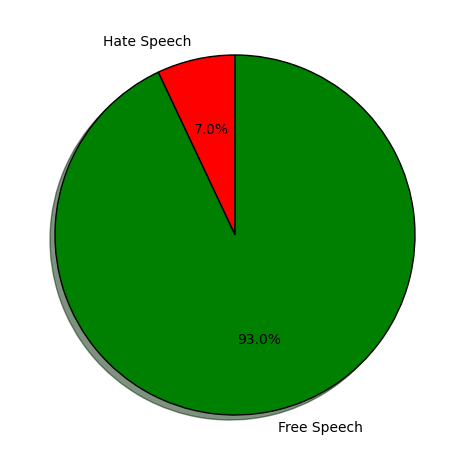

In [ ]:
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

In [ ]:
train_data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
test_data.isna().sum()

id       0
tweet    0
dtype: int64

# Data Preprocessing

## Convertion to Lowercase

In [ ]:
def to_lower_case(text):
    return text.lower()

train_data['tweet'] = train_data['tweet'].apply(to_lower_case)
test_data['tweet'] = test_data['tweet'].apply(to_lower_case)

## Removing the Punctuation

In [ ]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

train_data['tweet'] = train_data['tweet'].apply(remove_punct)
test_data['tweet'] = test_data['tweet'].apply(remove_punct)

## Removing the Special Characters

In [ ]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

train_data['tweet'] = train_data['tweet'].apply(remove_special)
test_data['tweet'] = test_data['tweet'].apply(remove_special)

## Removing the @ Mentions

In [ ]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

train_data['tweet'] = train_data['tweet'].apply(remove_tag)
test_data['tweet'] = test_data['tweet'].apply(remove_tag)

## Removing the Stopwords and stemming

**Stemming is nothing but reducing words to their base or root form.**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def rem_stop_words_stem(text):
  words = text.split()
  processed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
  return ' '.join(processed_words)

train_data['tweet'] = train_data['tweet'].apply(rem_stop_words_stem)
test_data['tweet'] = test_data['tweet'].apply(rem_stop_words_stem)

In [ ]:
train_data.head(10)

,id,label,tweet
0,1,0,user father dysfunct selfish drag kid dysfunct...
1,2,0,user user thank lyft credit cant use caus dont...
2,3,0,bihday majesti
3,4,0,model love u take u time
4,5,0,factsguid societi motiv
5,6,0,22 huge fan fare big talk leav chao pay disput...
6,7,0,user camp tomorrow user user user user user us...
7,8,0,next school year year cant think school exam h...
8,9,0,love land allin cav champion cleveland clevela...
9,10,0,user user welcom im gr8


In [ ]:
test_data.head()

,id,tweet
0,31963,studiolif aislif requir passion dedic willpow ...
1,31964,user white supremacist want everyon see new movi
2,31965,safe way heal acn altwaystoh healthi heal
3,31966,hp curs child book reserv alreadi ye harrypott...
4,31967,3rd bihday amaz hilari nephew eli ahmir uncl d...


# Data Visualization

## Tweet Length Distribution

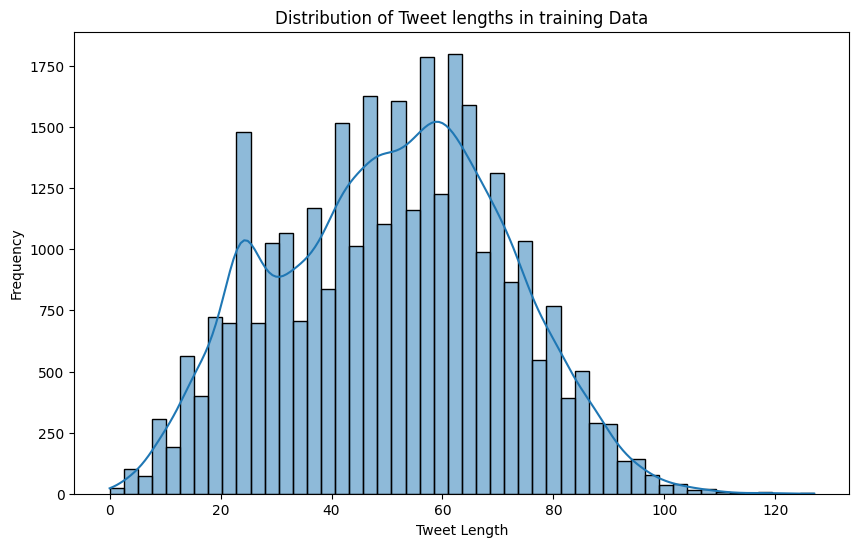

In [ ]:
train_data['tweet_length'] = train_data['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['tweet_length'], bins=50, kde=True)
plt.title("Distribution of Tweet lengths in training Data")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

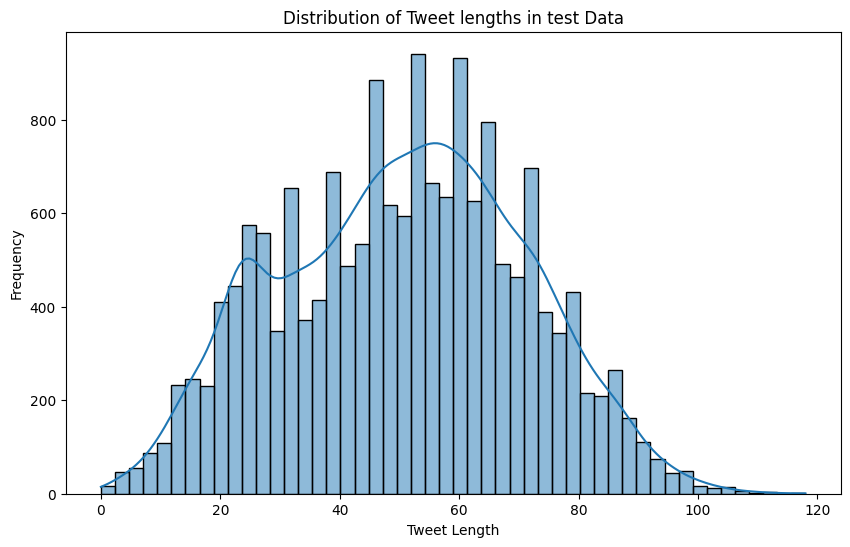

In [ ]:
test_data['tweet_length'] = test_data['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test_data['tweet_length'], bins=50, kde=True)
plt.title("Distribution of Tweet lengths in test Data")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

## Word Cloud

**Word Cloud is a visual representation of word frequency in a text. Words appear in different sizes, with larger words indicating more frequent mentions.**

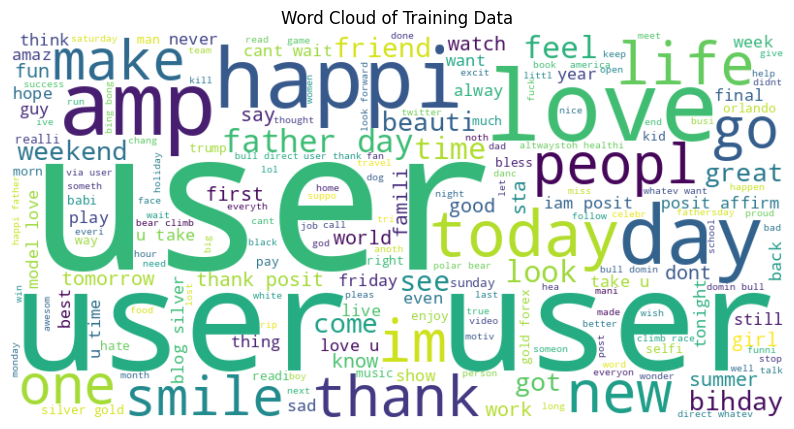

In [ ]:
text = ' '.join(train_data['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Training Data")
plt.axis('off')
plt.show()

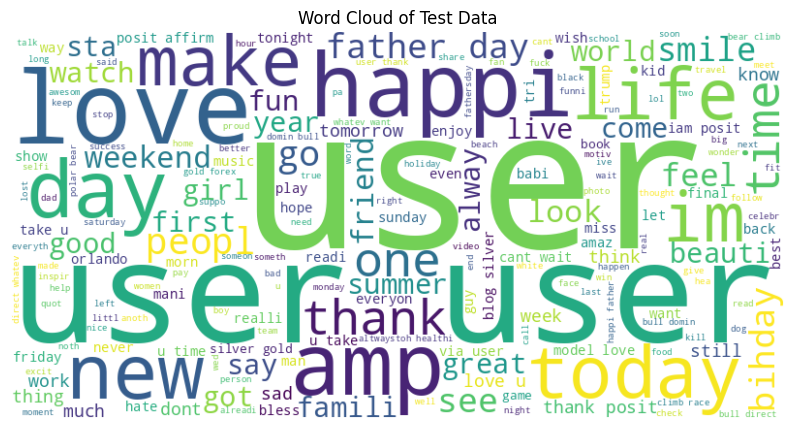

In [ ]:
text = ' '.join(test_data['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Test Data")
plt.axis('off')
plt.show()

## Class Distribution

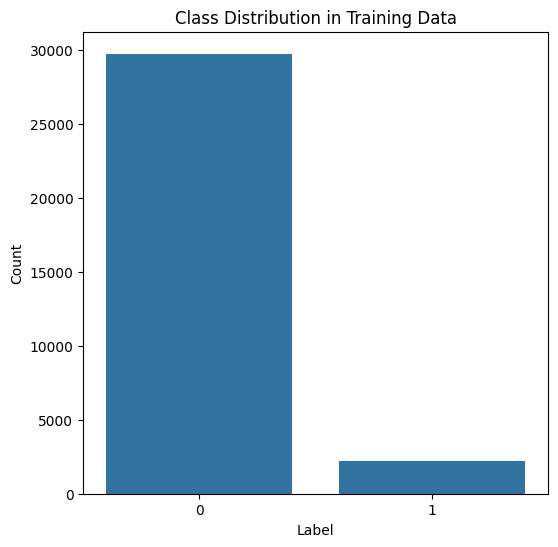

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=train_data)
plt.title('Class Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Common Words by Class

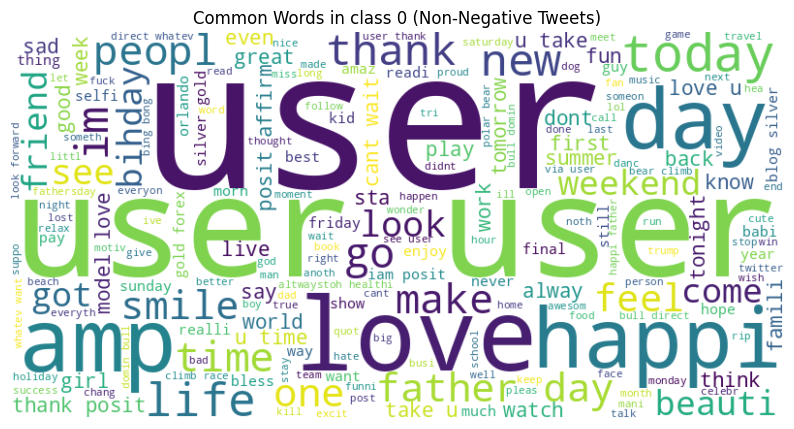

In [ ]:
label = 0
text = ' '.join(train_data[train_data['label'] == label]['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Common Words in class 0 (Non-Negative Tweets)")
plt.axis('off')
plt.show()

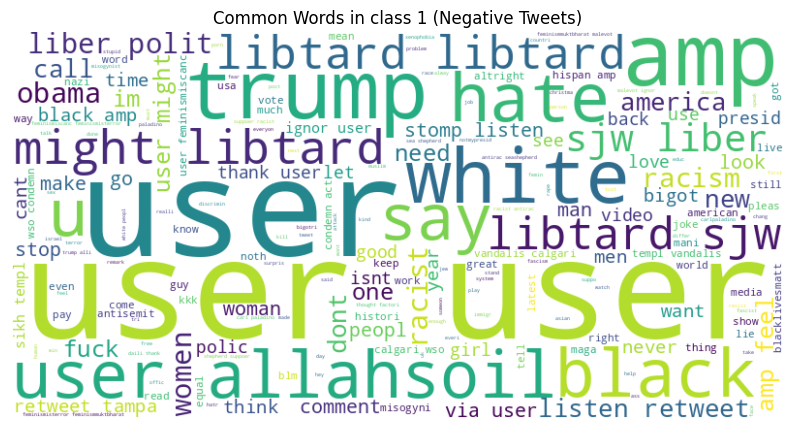

In [ ]:
label = 1
text = ' '.join(train_data[train_data['label'] == label]['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Common Words in class 1 (Negative Tweets)")
plt.axis('off')
plt.show()